In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
data = pd.read_csv('Heart_disease.csv')
data.head()

,age,sex,cp,restbp,chol,fbs,restecg,maxhr,exang,oldpeak,slope,mv,thal,diagnosis
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0


In [3]:
data['disease'] = np.where(data['diagnosis']>0,1,0)
data.rename(columns={'diagnosis':'diag'},inplace= True)

In [4]:
data.describe()

,age,sex,cp,restbp,chol,fbs,restecg,maxhr,exang,oldpeak,slope,mv,thal,diag,disease
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,299.000000,301.000000,303.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.672241,4.734219,0.937294,0.458746
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.937438,1.939706,1.228536,0.499120
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,2.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,4.000000,1.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   age      303 non-null    int64  
 1   sex      303 non-null    int64  
 2   cp       303 non-null    int64  
 3   restbp   303 non-null    int64  
 4   chol     303 non-null    int64  
 5   fbs      303 non-null    int64  
 6   restecg  303 non-null    int64  
 7   maxhr    303 non-null    int64  
 8   exang    303 non-null    int64  
 9   oldpeak  303 non-null    float64
 10  slope    303 non-null    int64  
 11  mv       299 non-null    float64
 12  thal     301 non-null    float64
 13  diag     303 non-null    int64  
 14  disease  303 non-null    int64  
dtypes: float64(3), int64(12)
memory usage: 35.6 KB


In [6]:
data.shape

(303, 15)

In [7]:
data.fillna(data.mean(),inplace = True)

In [9]:
from sklearn.model_selection import train_test_split

features = ['age','sex','cp','restbp','chol','fbs','restecg','maxhr','exang','oldpeak','slope','mv','thal']

X= data[features]
Y= data['disease']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

In [10]:
X_train.shape

(242, 13)

In [11]:
X_test.shape

(61, 13)

In [12]:
Y_train.shape

(242,)

In [13]:
Y_test.shape

(61,)

In [14]:
#KNN
#for 7 neighbours
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train,Y_train)
Y_pred_knn = knn.predict(X_test)

In [15]:
Y_pred_knn.shape

(61,)

In [22]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(Y_test, Y_pred_knn))
print(classification_report(Y_test, Y_pred_knn))

[[25  9]
 [10 17]]
              precision    recall  f1-score   support

           0       0.71      0.74      0.72        34
           1       0.65      0.63      0.64        27

    accuracy                           0.69        61
   macro avg       0.68      0.68      0.68        61
weighted avg       0.69      0.69      0.69        61



In [23]:
from sklearn import metrics

In [24]:
accuracy = metrics.accuracy_score(Y_test, Y_pred_knn)
print('Accuracy: {:.2f}'.format(accuracy))

Accuracy: 0.69


In [26]:
#accuracy from neighbors 1 to 20

accuracy = []
for k in range(1,21):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, Y_train)
    Y_pred_knn = knn.predict(X_test)
    accuracy.append(metrics.accuracy_score(Y_test, Y_pred_knn))
    
print(accuracy)
print()
max_accuracy = max(accuracy)
print(max_accuracy)
print()
print(accuracy.index(max_accuracy)+1)

[0.6885245901639344, 0.6229508196721312, 0.6557377049180327, 0.639344262295082, 0.7213114754098361, 0.6885245901639344, 0.7377049180327869, 0.7377049180327869, 0.7540983606557377, 0.8032786885245902, 0.7868852459016393, 0.7540983606557377, 0.6885245901639344, 0.7213114754098361, 0.6721311475409836, 0.7213114754098361, 0.7213114754098361, 0.7213114754098361, 0.7213114754098361, 0.7377049180327869]

0.8032786885245902

10


In [27]:
error = []
for k in range(1,21):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, Y_train)
    Y_pred_knn = knn.predict(X_test)
    error.append(np.mean(Y_pred_knn != Y_test))

Text(0, 0.5, 'Mean error')

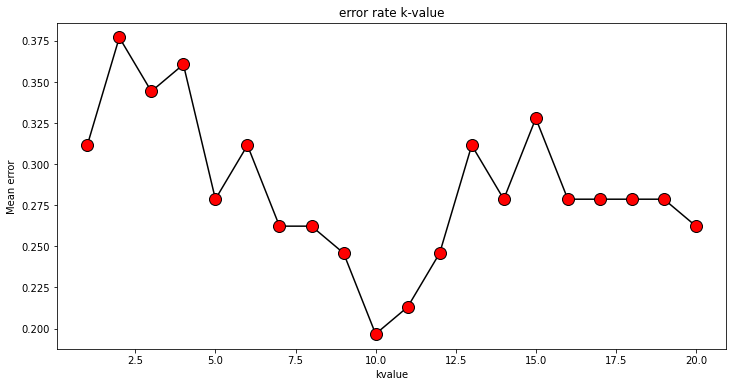

In [28]:
plt.figure(figsize=(12,6))
plt.plot(range(1,21), error, color='black', linestyle='solid',marker ='o', markerfacecolor='red', markersize=12)
plt.title('error rate k-value')
plt.xlabel('kvalue')
plt.ylabel('Mean error')